# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [201]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time 
import urllib
from scipy.stats import linregress
import scipy.stats as st


from api_keys import api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of lat and long
lat_range = (-90,90)
lng_range = (-180,180)

## Generate Cities List

In [202]:
# set up lists to hold reponse info
lat_lngs = []
cities = []


#create a set of random lat and long combos 
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1400)
lat_lngs = zip(lats,lngs)


# Loop through the list of cities and perform a request for data on each
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities: 
        cities.append(city)
        
len(cities)

581

In [203]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 
settings = {"units": "imperial", "appid": api_key}
url = f"{url}appid={api_key}&units={units}"

In [204]:
url

'http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [205]:
# Create empty lists to append the API data to 
latitude = []
longitude = []
temp_max = []
humidity = []
cloud_coverage = []
wind_speed = []
city_name = []
country = []
datetime = []

# Start counter
record_counter = 1

#Print what curretly retrieving data for 
print(f"Start Data Retrieval Process")
print(f"-------------------------------")

#Loop through list of cities and append to empty lists 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud_coverage.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        datetime.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {record_counter} | {city_record}")
        print(f"{url}&q={city}")
        
        record_counter= record_counter + 1        
        
    # Pass if city not found
    except:
        print("City not found")
    continue

Start Data Retrieval Process
-------------------------------
Processing Record 1 | Bonavista
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=bonavista
Processing Record 2 | La Santisima Trinidad
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=trinidad
Processing Record 3 | Hobart
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=hobart
Processing Record 4 | Verkhoyansk
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=verkhoyansk
Processing Record 5 | East London
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=east london
Processing Record 6 | Esim
http://api.openweathermap.org/data/2.5/weather?appid=aa93c53309c056c92eb6db60f5a5c869&units=imperial&q=axim
Processing Record 7 | Netivot
http://api.openweathermap.org/data/2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [206]:
# create a data frame from cities, lat, and temp
city_weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": temp_max,
    "Humidity": humidity,
    "Cloud coverage": cloud_coverage,
    "Wind Speed": wind_speed,
    "City datetime": datetime
}
#create a data frame from the dictionary 
city_weather_df = pd.DataFrame(city_weather_dict)

city_weather_df.count()


City               536
Country            536
Latitude           536
Longitude          536
Max Temperature    536
Humidity           536
Cloud coverage     536
Wind Speed         536
City datetime      536
dtype: int64

In [207]:
#a pandas dataframe is created and saved to a .csv from the data retrievied from the API 

city_weather_df.to_csv('city_weather_df.csv', encoding='utf-8', index=False)
city_weather_df


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloud coverage,Wind Speed,City datetime
0,Bonavista,CA,48.6499,-53.1147,37.00,87,100,14.97,1617083842
1,La Santisima Trinidad,BO,-14.8333,-64.9000,69.51,92,45,3.94,1617083842
2,Hobart,AU,-42.8794,147.3294,69.80,49,20,11.50,1617083741
3,Verkhoyansk,RU,67.5447,133.3850,16.92,77,78,1.57,1617083843
4,East London,ZA,-33.0153,27.9116,68.00,83,0,9.22,1617083843
...,...,...,...,...,...,...,...,...,...
531,Akçaabat,TR,41.0212,39.5715,50.00,71,40,5.75,1617083968
532,Goderich,CA,43.7501,-81.7165,41.00,56,16,13.80,1617083969
533,Havøysund,NO,70.9963,24.6622,35.60,75,75,4.61,1617083969
534,Tamiahua,MX,21.2667,-97.4500,66.97,91,99,3.11,1617083969


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [208]:
humidity= city_weather_df["Humidity"].max()
humidity

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

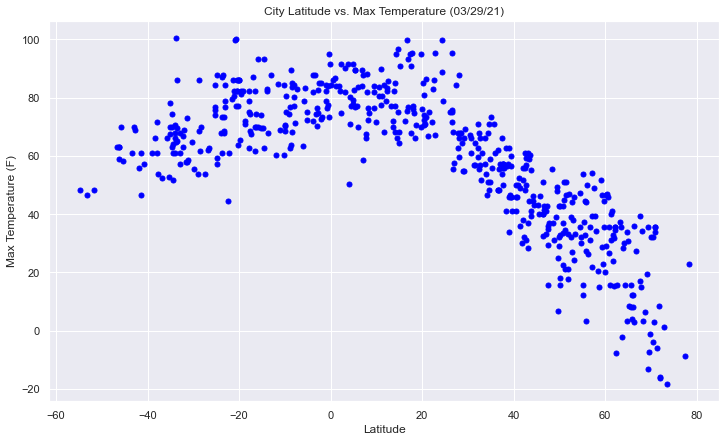

In [209]:
city_weather_df.plot.scatter(x="Latitude", y= "Max Temperature",s=25, color = "blue", figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Temperature.png")

## Latitude vs. Humidity Plot

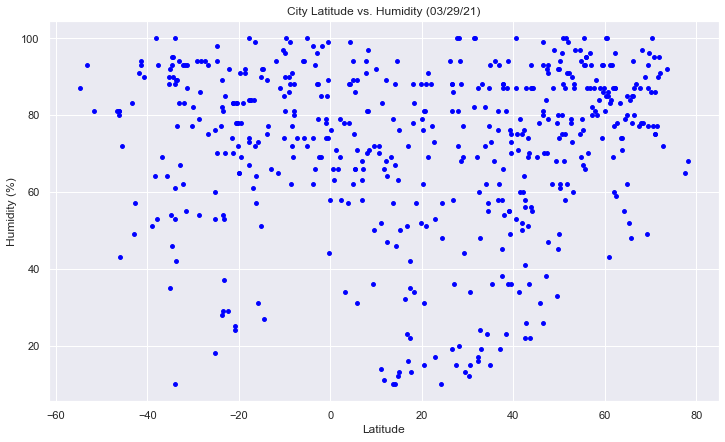

In [210]:
city_weather_df.plot.scatter(x="Latitude", y= "Humidity",s=15, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Humidity.png")


## Latitude vs. Cloudiness Plot

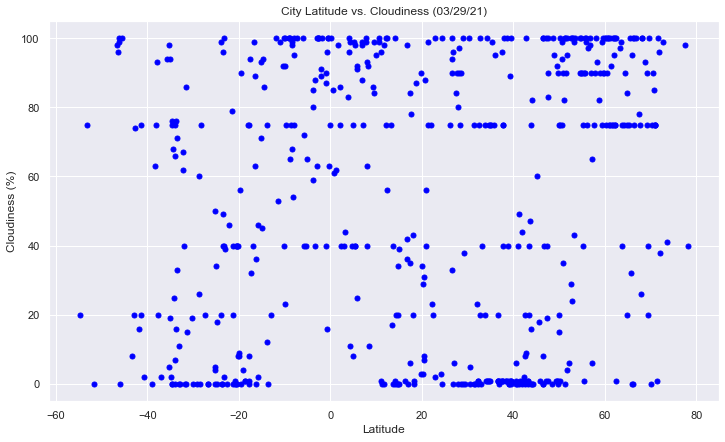

In [211]:
city_weather_df.plot.scatter(x="Latitude", y= "Cloud coverage",s=25, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Cloudiness.png");

## Latitude vs. Wind Speed Plot

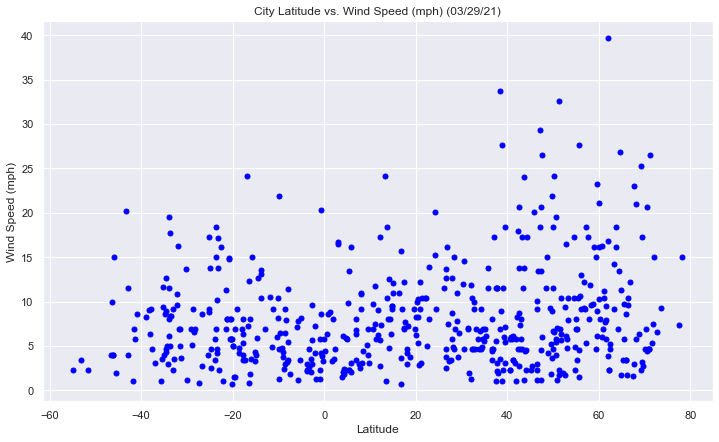

In [212]:
city_weather_df.plot.scatter(x="Latitude", y= "Wind Speed", marker = 'o',s=25, color = "blue",figsize=(12,7))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) (03/29/21)')
plt.savefig("../WeatherPy/Weather_Images/Latitude_Wind Speed.png");

In [239]:
hem=city_weather_df.sort_values(["Latitude"], ascending=True)
south = hem.head(177)
north=hem.tail(359)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [269]:
north_temp = north.iloc[:,4]
n_lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_temp,n_lat_plot)

print(f"The correlation coefficient for the northern hemisphere between max temp and latitude is {round(correlation[0],2)}")

The correlation coefficient for the northern hemisphere between max temp and latitude is -0.88


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [270]:
south_temp = south.iloc[:,4]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_temp,lat_plot)

print(f"The correlation coefficient for the southern hempisphere between max temp and latitude is {round(correlation[0],2)}")

The correlation coefficient for the southern hempisphere between max temp and latitude is 0.54


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [271]:
north_humidity = north.iloc[:,5]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_humidity,lat_plot)

print(f"The correlation coefficient for the northern hemisphere between humidity and latitude is {round(correlation[0],2)}")

The correlation coefficient for the northern hemisphere between humidity and latitude is 0.3


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [272]:
south_humidity = south.iloc[:,5]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_humidity,lat_plot)

print(f"The correlation coefficient for the southern hemisphere between humidity and latitude is {round(correlation[0],2)}")

The correlation coefficient for the southern hemisphere between humidity and latitude is 0.09


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [273]:
north_cloud = north.iloc[:,6]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_cloud,lat_plot)

print(f"The correlation coefficient for the northern hemisphere between cloud coverage and latitude is {round(correlation[0],2)}")

The correlation coefficient for the northern hemisphere between cloud coverage and latitude is 0.14


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [274]:
south_cloud = south.iloc[:,6]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_cloud,lat_plot)

print(f"The correlation coefficient for the southern hemisphere between cloud coverage and latitude is {round(correlation[0],2)}")

The correlation coefficient for the southern hemisphere between cloud coverage and latitude is 0.34


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [275]:
north_wind = north.iloc[:,7]
lat_plot = north.iloc[:,2]
correlation = st.pearsonr(north_wind,lat_plot)

print(f"The correlation coefficient for the northern hemisphere between wind speed and latitude is {round(correlation[0],2)}")

The correlation coefficient for the northern hemisphere between wind speed and latitude is 0.16


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [276]:
south_wind = south.iloc[:,7]
lat_plot = south.iloc[:,2]
correlation = st.pearsonr(south_wind,lat_plot)

print(f"The correlation coefficient for the southern hemisphere between wind speed and latitude is {round(correlation[0],2)}")

The correlation coefficient for the southern hemisphere between wind speed and latitude is -0.1
